In [1]:
import numpy as np
import pyodbc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn 
from pandas.api.types import CategoricalDtype
sns.set(style="ticks", color_codes=True)

C:\Users\DANIEL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
conn = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
                      "Server=DESKTOP-79V6INH\DANIEL1;"
                      "Database=pharmacy_1;"
                      "Trusted_Connection=yes;")

In [3]:
cursor = conn.cursor()
cursor.execute('SELECT * FROM dbo.pro_1')
full_data=cursor

In [5]:
df = pd.read_sql( 'SELECT * FROM dbo.pro_1',conn)
df.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq  
0  1000084527       20110         1  3.56    60  
1  1999004071       20120         1  0.35    30  
2  1999003192       20120         1  0.51    30  
3  1999001402       20110         1   7.7     8  
4  1999001542       20120         1  0.16    30

In [6]:
df['sku'] = df['sku'].astype(int)

### merge_pharma_1p

In [7]:
import pandas as pd

df1 = pd.read_csv (r'C:\Users\DANIEL\Documents\DataScience\data\pharma_1p.csv')
df1.head()

sku form  q_pac                    pharmaco_3 pharmaco_c
0  1000001081  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
1  1000001082  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
2  1000001083  TAB     28  LIPID MODIFYING AGENTS PLAIN       C10A
3  1000001618  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A
4  1000001689  TAB     30  LIPID MODIFYING AGENTS PLAIN       C10A

In [8]:
df1['sku'] = df1['sku'].astype(int)

In [9]:
df2 = df.merge(df1, on='sku', how='left')
df2.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [10]:
df2.shape

(12628378, 15)

In [11]:
df2.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers       object
price           object
tranq           object
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [12]:
df3=df2
df3=df2.loc[(df2['yyyy_mm'] <= '201906')]
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation customers price tranq form  q_pac  \
0  1000084527       20110         1  3.56    60  TAB   60.0   
1  1999004071       20120         1  0.35    30  TAB   30.0   
2  1999003192       20120         1  0.51    30  TAB   30.0   
3  1999001402       20110         1   7.7     8  INJ    5.0   
4  1999001542       20120         1  0.16    30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

In [13]:
df3.shape

(10527735, 15)

# droping [\"\',] from values & updating data types

In [14]:
df3['tranq'] = df3['tranq'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3['price'] = df3['price'].str.replace(r"[\"\',]", '')

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3['tranq'] = df3['tranq'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
df3['tranq'] = df3['tranq'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3['price'] = df3['price'].astype(float)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
df3['customers'] = df3['customers'].astype(int)

C:\Users\DANIEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3.dtypes

year            object
yyyy_mm         object
store_code      object
district        object
sku              int32
item_name       object
genery          object
affiliation     object
customers        int32
price          float64
tranq            int32
form            object
q_pac          float64
pharmaco_3      object
pharmaco_c      object
dtype: object

In [21]:
dfpy = df3[['customers', 'price','tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027E03EF9470>,
      dtype=object)

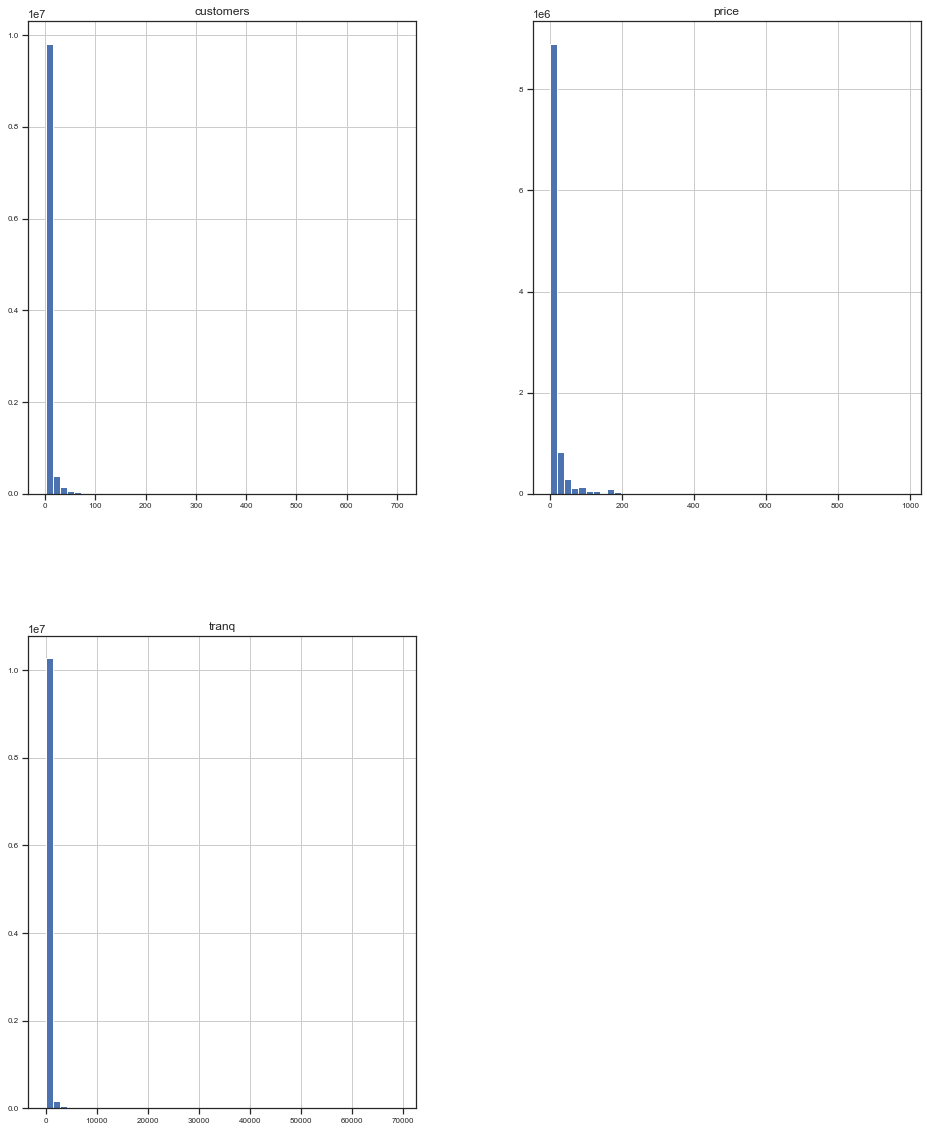

In [22]:
dfpy.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

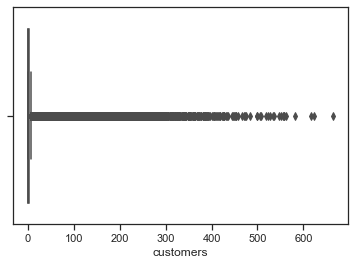

In [23]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

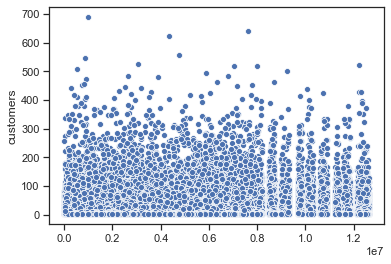

In [24]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

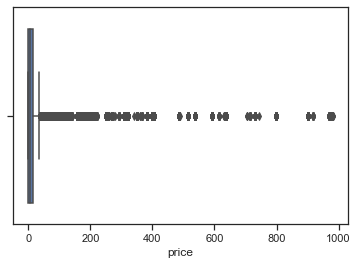

In [25]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

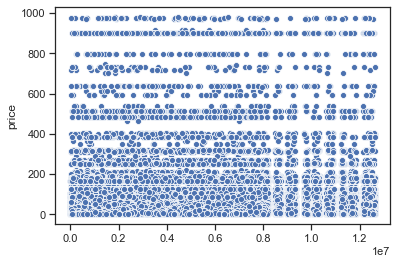

In [26]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

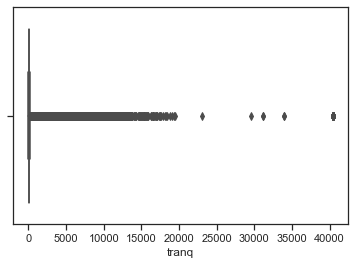

In [27]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

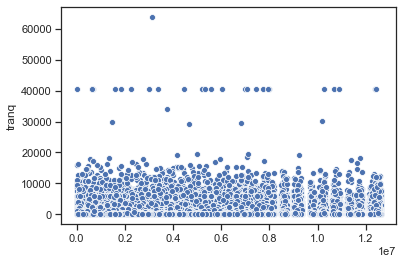

In [28]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

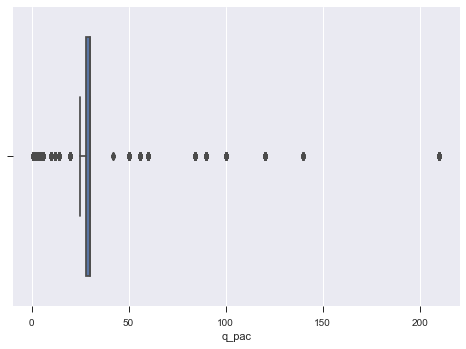

In [47]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

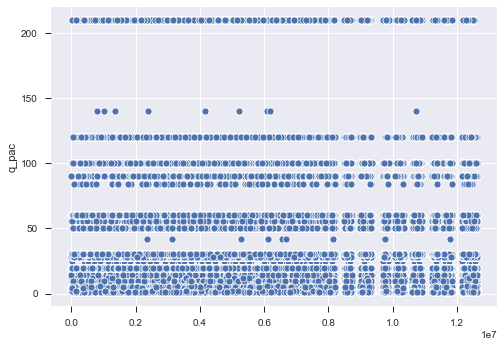

In [50]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

In [29]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

In [18]:
#dfeda = df1[['customers','price','tranq']]

In [40]:
#from pyMechkar import exploreData
#exploreData(dfeda.sample(n = 1000000), y="tranq")

# EDA

In [30]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df3.sample(n = 1000000))
prof.to_file(output_file='output.html')
prof.to_notebook_iframe()

In [38]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers  price  tranq form  q_pac  \
0  1000084527       20110          1   3.56     60  TAB   60.0   
1  1999004071       20120          1   0.35     30  TAB   30.0   
2  1999003192       20120          1   0.51     30  TAB   30.0   
3  1999001402       20110          1   7.70      8  INJ    5.0   
4  1999001542       20120          1   0.16     30  TAB   30.0   

                                  pharmaco_3 pharmaco_c  
0                      ANTITHROMBOTIC AGENTS       B01A  
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES       C03B  
2               LIPID MODIFYING AGENTS PLAIN       C10A  
3                          IRON PREPARATIONS       B03A  
4               LIPID MODIFYING AGENTS PLAIN       C10A

# binary encoding

## affiliation

In [39]:
s = df3['affiliation'].value_counts(normalize=True) * 100 
df3['affiliation_Binary'] = df3['affiliation'].map(s)

In [40]:
df3[['affiliation_Binary', 'affiliation']].head()

affiliation_Binary affiliation
0           20.486952       20110
1           76.558215       20120
2           76.558215       20120
3           20.486952       20110
4           76.558215       20120

## district

In [41]:
s = df3['district'].value_counts(normalize=True) * 100 
df3['district_Binary'] = df3['district'].map(s)

In [42]:
df3.sample(n = 100)[['district_Binary', 'district']].head()

district_Binary district
5923158        12.842800      777
1015368        16.633169      577
3817611        13.209299      477
8581311        11.412844      977
2666535        14.894609     1277

## form

In [43]:
s = df3['form'].value_counts(normalize=True) * 100 
df3['form_Binary'] = df3['form'].map(s)

In [44]:
df3.sample(n = 100)[['form_Binary', 'form']].head()

form_Binary form
3873882     85.129888  TAB
10744233     2.724451  CAP
11751971    85.129888  TAB
11831427    85.129888  TAB
1046706     85.129888  TAB

## store_code

In [45]:
s = df3['store_code'].value_counts(normalize=True) * 100 
df3['store_code_Binary'] = df3['store_code'].map(s)

In [46]:
df3.sample(n = 100)[['store_code_Binary', 'store_code']].head()

store_code_Binary store_code
12490622           0.086837       5873
8587171            0.101551       5282
2728829            0.052832       5250
8039335            0.131975       4901
11831590           0.042155       4479

# log x+1

## ['customers', 'price','tranq', 'q_pac']

In [52]:
to_log = ['customers', 'price','tranq', 'q_pac']

In [53]:
df3[to_log] = df3[to_log].applymap(lambda x: np.log(x+1)) # add columns log to dataframe

# one hot encoding

# year

In [56]:
# Get one hot encoding of columns a
one_hot = pd.get_dummies(df3['year'])
df3 = df3.join(one_hot) 

In [58]:
with pd.option_context('display.precision', 2):
           df3[['affiliation_Binary','district_Binary']]

In [59]:
df3.head()

year yyyy_mm store_code district         sku            item_name  \
0  2017  201711       5224      477  1000084527   ELIQUIS TAB 5mg 60   
1  2017  201711       5224      477  1000110761   PAMID TAB 2.5mg 30   
2  2017  201711       5224      477  1000111352   EZECOR TAB 10mg 30   
3  2017  201711       5224      477  1110006071  VENOFER INJ 100mg 5   
4  2017  201711       5224      477  1110014724  LIPITOR TAB 20mg 30   

       genery affiliation  customers     price  ...     q_pac  \
0  1000084527       20110   0.693147  1.517323  ...  4.110874   
1  1999004071       20120   0.693147  0.300105  ...  3.433987   
2  1999003192       20120   0.693147  0.412110  ...  3.433987   
3  1999001402       20110   0.693147  2.163323  ...  1.791759   
4  1999001542       20120   0.693147  0.148420  ...  3.433987   

                                  pharmaco_3  pharmaco_c affiliation_Binary  \
0                      ANTITHROMBOTIC AGENTS        B01A          20.486952   
1  LOW CEILING DIURETICS EXCLUDING THIAZIDES        C03B          76.558215   
2               LIPID MODIFYING AGENTS PLAIN        C10A          76.558215   
3                          IRON PREPARATIONS        B03A          20.486952   
4               LIPID MODIFYING AGENTS PLAIN        C10A          76.558215   

  district_Binary  form_Binary  store_code_Binary  2017  2018  2019  
0       13.209299    85.129888           0.183249     1     0     0  
1       13.209299    85.129888           0.183249     1     0     0  
2       13.209299    85.129888           0.183249     1     0     0  
3       13.209299     2.669188           0.183249     1     0     0  
4       13.209299    85.129888           0.183249     1     0     0  

[5 rows x 22 columns]

# Outlier Detection

### Graphical methods

#### customers

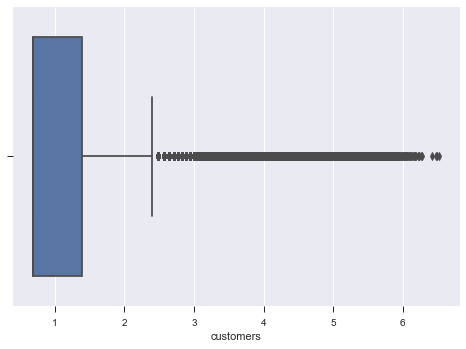

In [60]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['customers'])

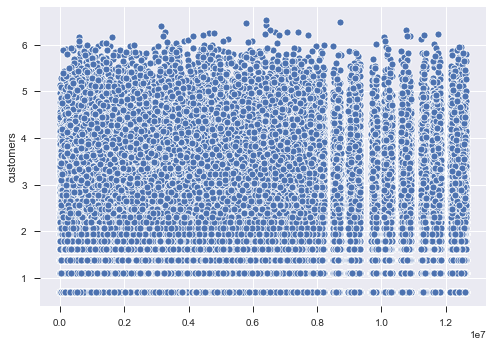

In [61]:
###  using scatterplots
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['customers'])

### price

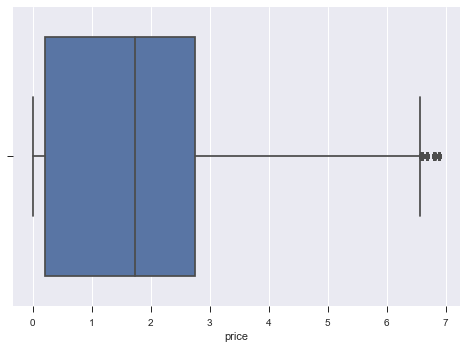

In [62]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['price'])

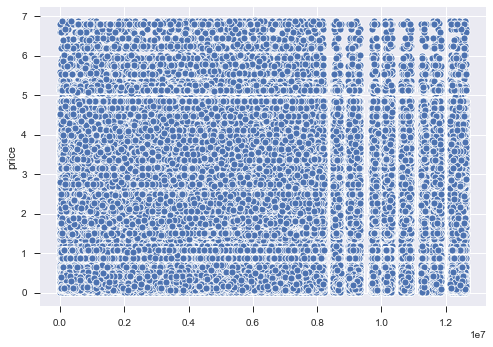

In [63]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['price'])

### tranq

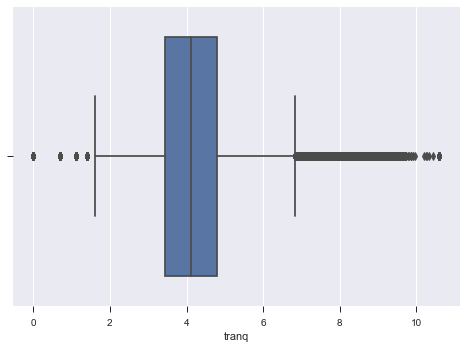

In [64]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['tranq'])

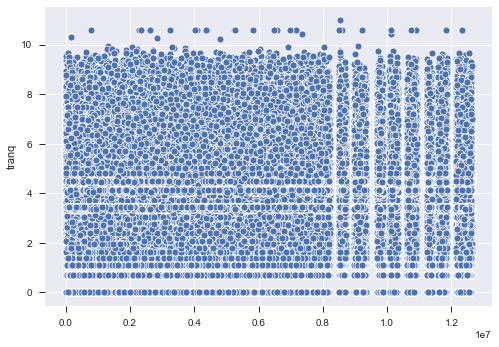

In [65]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['tranq'])

## q_pac

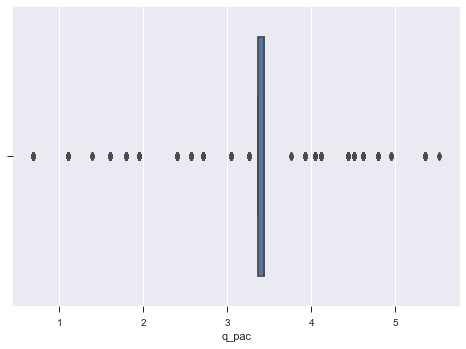

In [66]:
## Using box (Wiskers) plot
outl = sns.boxplot(df3.sample(n = 1000000)['q_pac'])

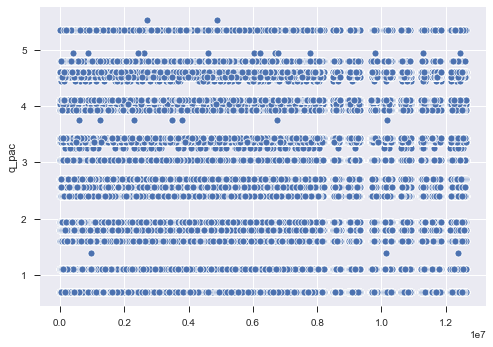

In [67]:
sns.scatterplot(x=df3.sample(n = 1000000).index,y=df3.sample(n = 1000000)['q_pac'])

# Missing Values

In [68]:
print(df3.isnull().sum())

year                  0
yyyy_mm               0
store_code            0
district              0
sku                   0
item_name             0
genery                0
affiliation           0
customers             0
price                 0
tranq                 0
form                  0
q_pac                 0
pharmaco_3            0
pharmaco_c            0
affiliation_Binary    0
district_Binary       0
form_Binary           0
store_code_Binary     0
2017                  0
2018                  0
2019                  0
dtype: int64


In [32]:
# Replace missing values with a number
df3['form'].fillna('TAB', inplace=True)

In [34]:
# Replace missing values with a number
df3['q_pac'].fillna(30, inplace=True)

In [35]:
# Replace missing values with a number
df3['pharmaco_3'].fillna('LIPID MODIFYING AGENTS PLAIN', inplace=True)

In [36]:
# Replace missing values with a number
df3['pharmaco_c'].fillna('C10A', inplace=True)

## cheking target value after imputaion

In [69]:
dfpy = df3[['tranq']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027F569F3D30>]],
      dtype=object)

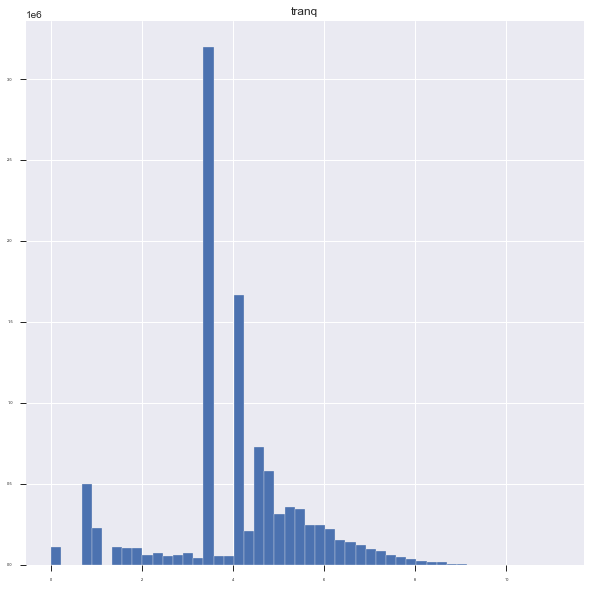

In [70]:
dfpy.hist(figsize=(10, 10), bins=50, xlabelsize=4, ylabelsize=4)

# Feature Selection